## Gradient Descent


In [1]:
# From exam 20220708
import numpy as np
import matplotlib.pyplot as plt

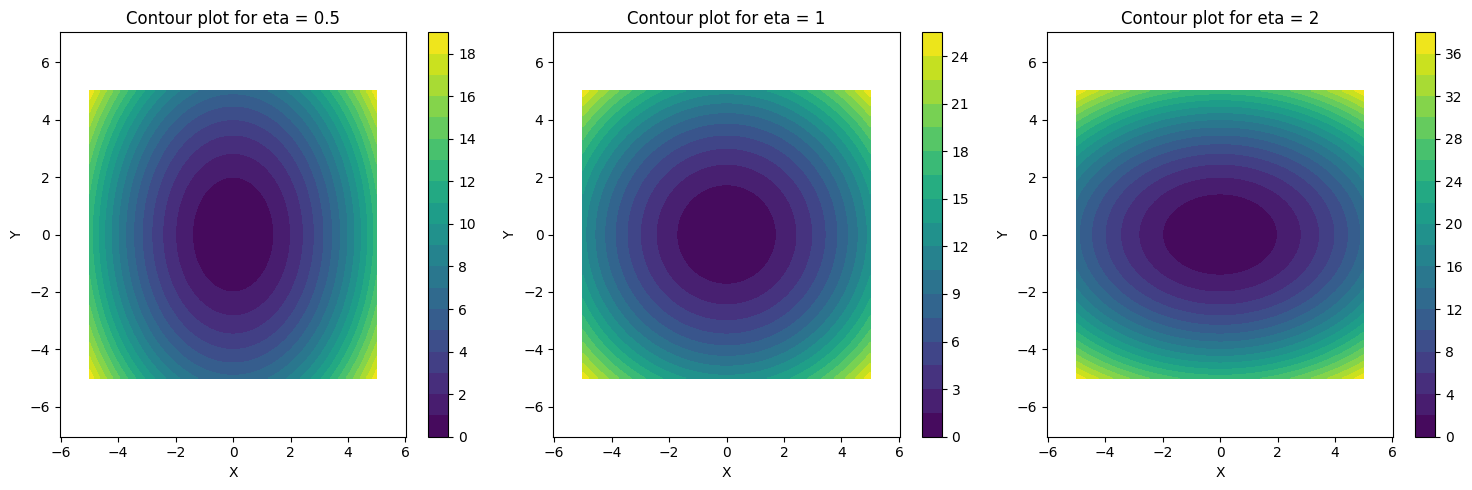

In [3]:
# Define parameters for the grid and function
xmin, xmax, Nx = -5, 5, 100
ymin, ymax, Ny = -5, 5, 100
eta_values = [0.5, 1, 2]  # Different values of eta to analyze
Ncontour = 20  # Number of contour levels

# Create a grid
x = np.linspace(xmin, xmax, Nx)
y = np.linspace(ymin, ymax, Ny)
XX, YY = np.meshgrid(x, y)

# Plot contour plots for different values of eta
plt.figure(figsize=(15, 5))
for i, eta in enumerate(eta_values, 1):
    F = (XX**2 + eta * YY**2) / 2
    plt.subplot(1, len(eta_values), i)
    contour = plt.contourf(XX, YY, F, Ncontour, cmap="viridis")
    plt.colorbar(contour)
    plt.title(f"Contour plot for eta = {eta}")
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.axis("equal")

plt.tight_layout()
plt.show()


Comments:

The contour lines represent different levels of the function FF, and the shape of the contours varies based on eta. For smaller eta, the contours are more stretched along the x-axis, while for larger η, they are more stretched along the y-axis.


In [5]:
import sympy as sp

# Define the symbols
x1, x2, eta = sp.symbols("x1 x2 eta")

# Define the function f
f = (x1**2 + eta * x2**2) / 2

# Compute the gradient of f
gradient_f = [sp.diff(f, var) for var in (x1, x2)]

# Compute the Hessian matrix of f
hessian_f = sp.hessian(f, (x1, x2))

# Evaluate for specific eta (e.g., eta = 1)
eta_value = 1
# Substitute eta = 1 into the Hessian matrix
hessian_f_eta1 = hessian_f.subs(eta, eta_value)

# Compute the eigenvalues of the Hessian matrix with eta = 1
eigenvalues_eta1 = hessian_f_eta1.eigenvals()

# Extract the maximum eigenvalue (spectral norm)
spectral_norm_eta1 = max(eigenvalues_eta1.keys())

# Compute maximum tau_k for convergence
max_tau_k_eta1 = 2 / spectral_norm_eta1

(
    gradient_f,
    hessian_f,
    hessian_f_eta1,
    eigenvalues_eta1,
    spectral_norm_eta1,
    max_tau_k_eta1,
)

([x1, eta*x2],
 Matrix([
 [1,   0],
 [0, eta]]),
 Matrix([
 [1, 0],
 [0, 1]]),
 {1: 2},
 1,
 2)

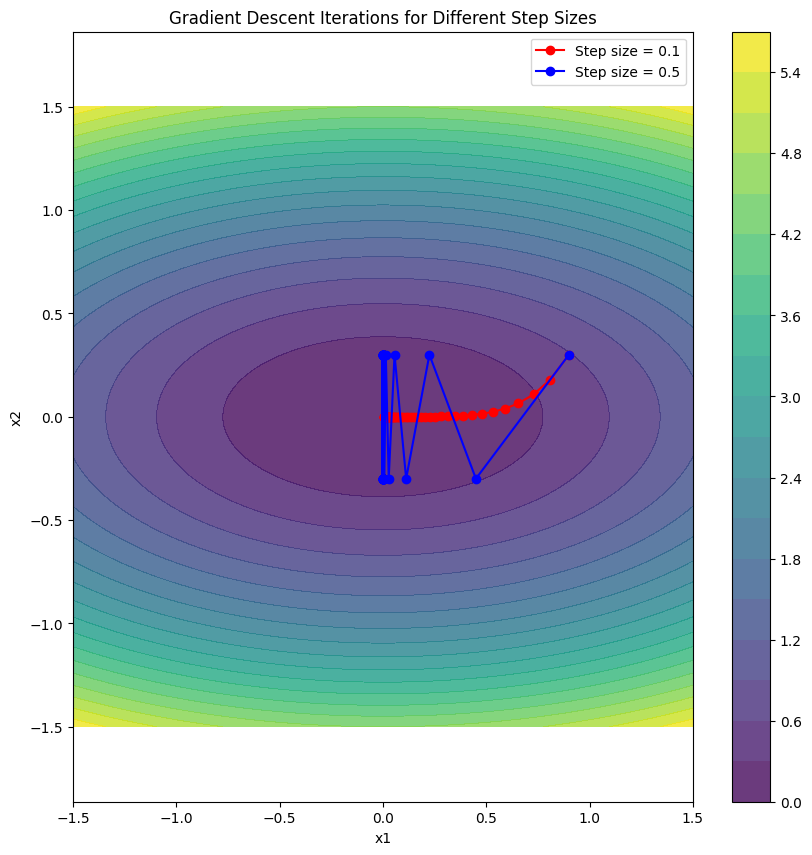

In [15]:
# Parameters for gradient descent
eta_value = 4  # Given eta
x0 = np.array([0.9, 0.3])  # Initial point
step_sizes = [0.1, 0.5]  # Different step sizes to test
max_iters = 50  # Maximum number of iterations
tol = 1e-6  # Tolerance for stopping criteria


# Define the function and its gradient
def f(x, eta):
    return (x[0] ** 2 + eta * x[1] ** 2) / 2


def grad_f(x, eta):
    return np.array([x[0], eta * x[1]])


# Gradient Descent Method
def gradient_descent(x0, eta, step_size, max_iters, tol):
    x_vals = [x0]
    x = x0.copy()
    for _ in range(max_iters):
        grad = grad_f(x, eta)
        x_new = x - step_size * grad
        x_vals.append(x_new)
        if np.linalg.norm(x_new - x) < tol:  # Convergence check
            break
        x = x_new
    return np.array(x_vals)


# Generate contour plot for eta = 4
xmin, xmax, Nx = -1.5, 1.5, 100
ymin, ymax, Ny = -1.5, 1.5, 100
x = np.linspace(xmin, xmax, Nx)
y = np.linspace(ymin, ymax, Ny)
XX, YY = np.meshgrid(x, y)
F = (XX**2 + eta_value * YY**2) / 2

plt.figure(figsize=(10, 10))
contour = plt.contourf(XX, YY, F, levels=20, cmap="viridis", alpha=0.8)
plt.colorbar(contour)
colors = ["red", "blue"]
for step_size, color in zip(step_sizes, colors):
    x_vals = gradient_descent(x0, eta_value, step_size, max_iters, tol)
    plt.plot(
        x_vals[:, 0], x_vals[:, 1], "-o", color=color, label=f"Step size = {step_size}"
    )
plt.title("Gradient Descent Iterations for Different Step Sizes")
plt.xlabel("x1")
plt.ylabel("x2")
plt.legend()
plt.axis("equal")
plt.show()

In [ ]:
def grad_f(x):
    return np.array([x[0], eta_value * x[1]])


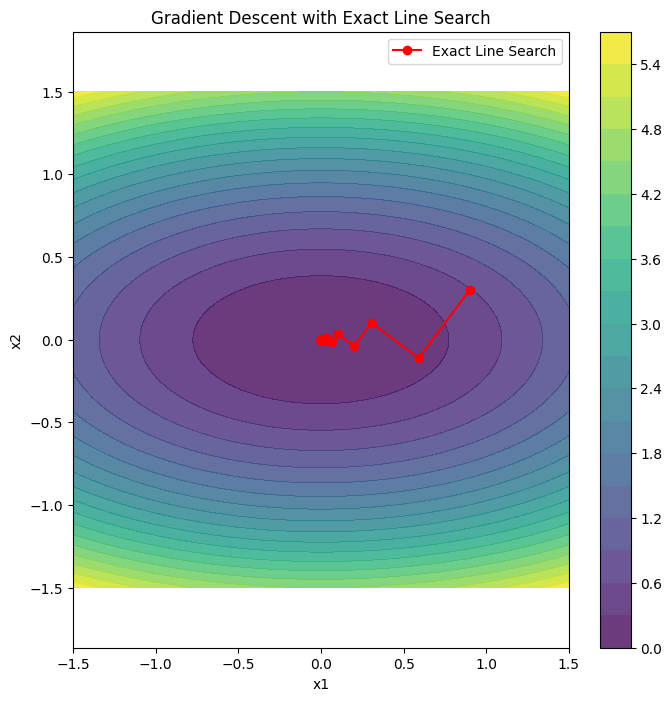

In [8]:
# Gradient Descent with Exact Line Search
def exact_line_search_gradient_descent(x0, eta, max_iters, tol):
    x_vals = [x0]
    x = x0.copy()

    for _ in range(max_iters):
        grad = grad_f(x, eta)

        # Compute the optimal step size (exact line search)
        # tau_k = argmin_tau f(x - tau * grad_f(x))
        # The optimal tau_k for this quadratic function is given by:
        tau_k = np.dot(grad, grad) / (grad[0] ** 2 + eta * grad[1] ** 2)

        # Update x
        x_new = x - tau_k * grad
        x_vals.append(x_new)

        # Check for convergence
        if np.linalg.norm(x_new - x) < tol:
            break

        x = x_new

    return np.array(x_vals)


# Perform gradient descent with exact line search
x_vals_exact = exact_line_search_gradient_descent(x0, eta_value, max_iters, tol)

# Generate contour plot for visualization
plt.figure(figsize=(8, 8))
contour = plt.contourf(XX, YY, F, levels=20, cmap="viridis", alpha=0.8)
plt.colorbar(contour)
plt.plot(
    x_vals_exact[:, 0], x_vals_exact[:, 1], "-o", color="red", label="Exact Line Search"
)
plt.title("Gradient Descent with Exact Line Search")
plt.xlabel("x1")
plt.ylabel("x2")
plt.legend()
plt.axis("equal")
plt.show()


Comments:

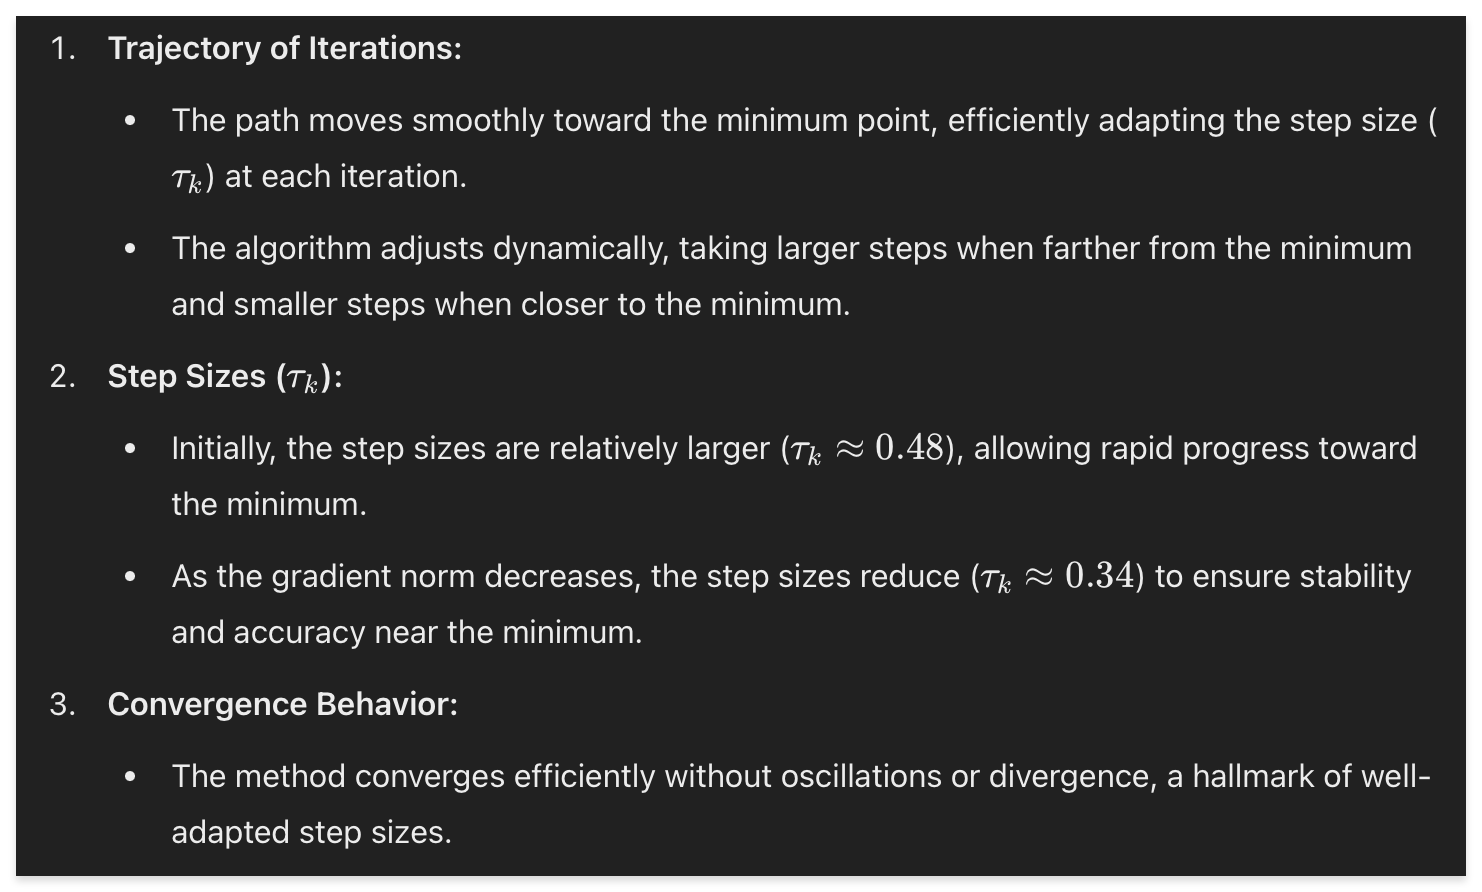


## quadratic function


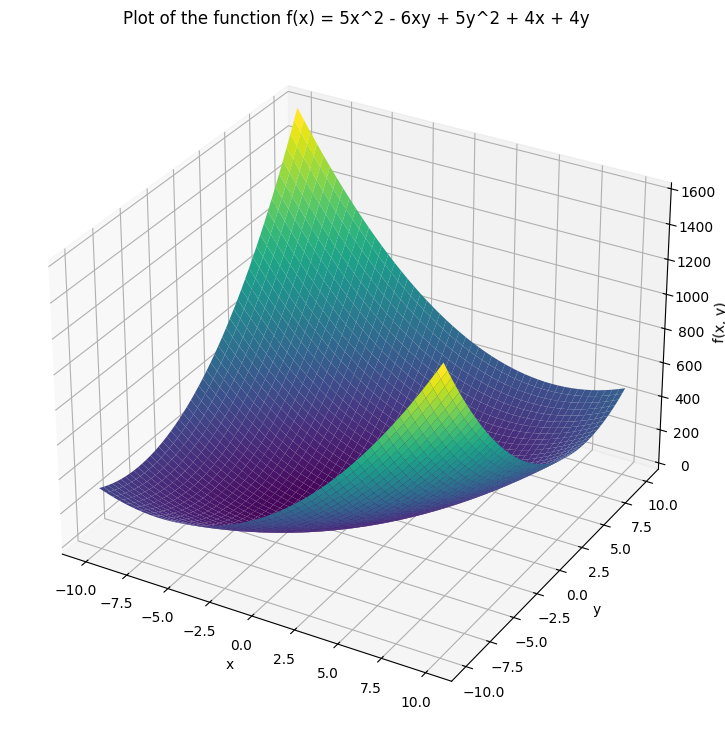

In [1]:
import numpy as np
import matplotlib.pyplot as plt


# Define the function f(x, y)
def f(x, y):
    return 5 * x**2 - 6 * x * y + 5 * y**2 + 4 * x + 4 * y


# Create a grid of points
x = np.linspace(-10, 10, 400)
y = np.linspace(-10, 10, 400)
x, y = np.meshgrid(x, y)
z = f(x, y)

# Plot the function
fig = plt.figure(figsize=(14, 9))
ax = fig.add_subplot(111, projection="3d")
ax.plot_surface(x, y, z, cmap="viridis", edgecolor="none")

# Set labels and title
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("f(x, y)")
ax.set_title("Plot of the function f(x) = 5x^2 - 6xy + 5y^2 + 4x + 4y")

# Show the plot
plt.show()

Compute analitically the value $x_min$ where the function attains its minimum value


In [2]:
from scipy.optimize import minimize


# Define the function to minimize
def func_to_minimize(x):
    return 5 * x[0] ** 2 - 6 * x[0] * x[1] + 5 * x[1] ** 2 + 4 * x[0] + 4 * x[1]


# Initial guess for x and y
initial_guess = [0, 0]

# Use scipy's minimize function to find the minimum
result = minimize(fun=func_to_minimize, x0=initial_guess)

# The result object contains various information from the optimization process
xmin_scipy = result.x
fmin_scipy = result.fun

xmin_scipy, fmin_scipy

(array([-1.00000001, -1.00000001]), np.float64(-3.999999999999999))

To express the given function in the form $f(x) = \frac{1}{2}x^T Hx + d^T x + c$, we identify the quadratic, linear, and constant parts of $f(x, y) = 5x^2 - 6xy + 5y^2 + 4x + 4y$.

The quadratic form $\frac{1}{2}x^T Hx$ corresponds to the part of the function involving $ x^2 $ and $ y^2 $, and the mixed term $ xy $. For our function, $ H $ is a 2x2 matrix where the diagonal elements are the coefficients of $ x^2 $ and $ y^2 $ (multiplied by 2 because of the $ \frac{1}{2} $ in front of the quadratic form), and the off-diagonal elements are half of the coefficient of the $ xy $ term (since $ x^T Hx $ will produce two $ xy $ terms when expanded). The vector $ d $ contains the coefficients of the linear terms $ x $ and $ y $, and $ c $ is the constant term.

Let's write down the matrix $ H $, the vector $ d $, and the constant $ c $, and then we can determine whether $ H $ is positive definite.

The matrix $ H $ is:
\begin{equation}
H = \begin{bmatrix} 10 & -6 \\ -6 & 10 \end{bmatrix}
\end{equation}

The vector $ d $ is:
\begin{equation}
d = \begin{bmatrix} 4 \\ 4 \end{bmatrix}
\end{equation}

The constant $ c $ is zero in this case since there is no constant term in the function $ f(x) $.


To check if $ H $ is positive definite, we can look at its eigenvalues: a symmetric matrix is positive definite if and only if all its eigenvalues are positive. Let's compute the eigenvalues.

The matrix $ H $, vector $ d $, and constant $ c $ for the function $ f(x) $ are:

\begin{equation}
H = \begin{bmatrix} 10 & -6 \\ -6 & 10 \end{bmatrix}, \quad d = \begin{bmatrix} 4 \\ 4 \end{bmatrix}, \quad c = 0
\end{equation}

The eigenvalues of $ H $ are $ [16, 4] $. Since all eigenvalues are positive, the matrix $ H $ is positive definite. This indicates that the function $ f(x) $ is convex, and therefore the point found earlier, $ x\_{\text{min}} = (-1, -1) $, is indeed the global minimum of the function.

The matrix $ H $ in the expression $ f(x) = \frac{1}{2}x^T Hx + d^T x + c $ is called the Hessian matrix of the function $ f $. In the context of optimization and calculus, the Hessian matrix is a square matrix of second-order partial derivatives of a scalar-valued function, or scalar field. It describes the local curvature of a function of many variables.


The gradient descent (GD) method is defined by the iteration:

\begin{equation}
x\_{k+1} = x_k - \alpha \nabla f(x_k)
\end{equation}

where $ \alpha $ is the learning rate. The function $ f $ can be written in the form $ f(x) = \frac{1}{2}x^T Hx + d^T x + c $, where $ H $ is the Hessian matrix, $ d $ is a vector of coefficients for the linear terms, and $ c $ is a constant. The gradient $ \nabla f(x) $ is then given by:

\begin{equation}
\nabla f(x) = Hx + d
\end{equation}

Substituting the gradient into the GD iteration gives:
\begin{equation}
x\_{k+1} = x_k - \alpha (Hx_k + d)
\end{equation}
For gradient descent to be convergent, the spectral radius $ \rho $ of the iteration matrix must be less than 1. The iteration matrix in this case would be $ I - \alpha H $, where $ I $ is the identity matrix.

The spectral radius $ \rho $ is the largest absolute value among the eigenvalues of the iteration matrix. Therefore, we require:
\begin{equation}
\rho(I - \alpha H) < 1
\end{equation}

This inequality must be satisfied by all eigenvalues $ \lambda_i $ of $ H $:
\begin{equation}
\left| 1 - \alpha \lambda_i \right| < 1
\end{equation}

Thus:

\begin{equation}
\begin{cases}
1 - \alpha \lambda_i < 1 &\implies \alpha \lambda_i > 0&, 1 - \alpha \lambda_i > 0 \\
-1+\alpha \lambda_i < 1 &\implies \alpha < \frac{2}{\lambda_i}&, 1 - \alpha \lambda_i < 0
\end{cases}\,.
\end{equation}


In [11]:
import jax
import jax.numpy as jnp


def gradient_descent(f, grad_f, initial_x, alpha, epsilon, max_iterations):
    """
    Implements the gradient descent optimization algorithm.

    :param f: The function to be minimized.
    :param grad_f: The gradient of the function.
    :param initial_x: Initial guess for the minimum.
    :param alpha: Learning rate.
    :param epsilon: Convergence tolerance.
    :param max_iterations: Maximum number of iterations.
    :return: The approximate minimum point.
    """
    x = np.array(initial_x, dtype=float)
    for _ in range(max_iterations):
        x_new = x - alpha * np.array(grad_f(x))
        # Check for convergence
        if np.abs(f(x_new) - f(x)) < epsilon:
            return x_new
        x = x_new
    return x


# Define the function f(x, y) using jax.numpy
def func_jax(x):
    return 5 * x[0] ** 2 - 6 * x[0] * x[1] + 5 * x[1] ** 2 + 4 * x[0] + 4 * x[1]


# Use jax.grad to automatically compute the gradient of the function
grad_func_jax = jax.grad(func_jax)

# Initial guess, learning rate, tolerance, and maximum iterations
initial_guess = [-5, 7]
learning_rate = 0.125  # from previous calculation
tolerance = 1e-3
max_iterations = 2000

# Perform gradient descent
xmin_gd = gradient_descent(
    func_jax, grad_func_jax, initial_guess, learning_rate, tolerance, max_iterations
)

f"Minimum point: {xmin_gd}, Minimum value: {func_jax(xmin_gd)}, did not converge near the true minimum"

'Minimum point: [-6.9921875  5.0078125], Minimum value: 572.000244140625, did not converge near the true minimum'

In [8]:
# Initial guess, learning rate, tolerance, and maximum iterations
initial_guess = [-5, 7]
learning_rate = 0.123  # from previous calculation
tolerance = 1e-3
max_iterations = 200

# Perform gradient descent
xmin_gd = gradient_descent(
    func_jax, grad_func_jax, initial_guess, learning_rate, tolerance, max_iterations
)

f"Minimum point: {xmin_gd}, Minimum value: {func_jax(xmin_gd)}, converged near the minimum"

'Minimum point: [-0.97008847 -1.02991164], Minimum value: -3.985684753178961, converged near the minimum'

## Stochastic Gradient Descent


In [13]:
X = np.genfromtxt("datasets/X.dat")
y = np.genfromtxt("datasets/y.dat")

In [14]:
X.shape, y.shape

((10000, 46), (10000,))

In [15]:
# Defining the function f(x)
def loss_fn(w, x, y):
    return jnp.mean(jnp.log(1 + jnp.exp(-y * jnp.dot(x, w))))


loss_jit = jax.jit(loss_fn)
grad_fn = jax.grad(loss_fn, argnums=0)
grad_fn = jax.jit(grad_fn)

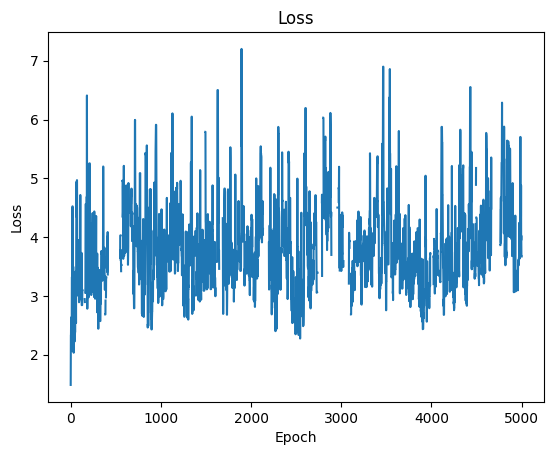

In [16]:
# implement the SGD algorithm, with constant learning rate
batch_size = 1
lr = 0.5
n_epochs = 5000

convergence_history = []

# initialize the weights
w = jnp.array([0.0 for i in range(X.shape[1])])

for i in range(n_epochs):
    # randomly sample a batch
    idx = np.random.choice(X.shape[0], batch_size)
    X_batch = X[idx]
    y_batch = y[idx]

    grad = grad_fn(w, X_batch, y_batch)
    w = w - lr * grad
    convergence_history.append(loss_jit(w, X, y))

plt.figure()
plt.plot(convergence_history)
plt.title("Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

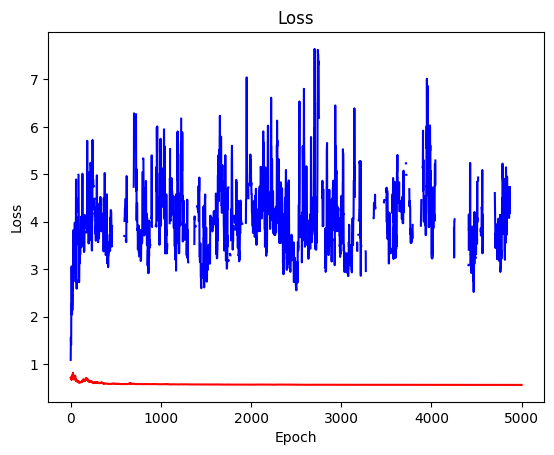

In [19]:
batch_size = 1
lr_0 = 0.5
n_epochs = 5000

convergence_history = []
convergence_history_update_lr = []
update_lr = True
# initialize the weights
w = jnp.array([0.0 for i in range(X.shape[1])])

for i in range(n_epochs):
    lr = lr_0
    # randomly sample a batch
    idx = np.random.choice(X.shape[0], batch_size)
    X_batch = X[idx]
    y_batch = y[idx]

    grad = grad_fn(w, X_batch, y_batch)
    w = w - lr * grad
    convergence_history.append(loss_jit(w, X, y))

w = jnp.array([0.0 for i in range(X.shape[1])])
lr_0 = 0.05
for i in range(n_epochs):
    lr = lr_0 / (1 + i / 100)
    # randomly sample a batch
    idx = np.random.choice(X.shape[0], batch_size)
    X_batch = X[idx]
    y_batch = y[idx]

    grad = grad_fn(w, X_batch, y_batch)
    w = w - lr * grad
    convergence_history_update_lr.append(loss_jit(w, X, y))

plt.figure()
plt.plot(convergence_history, label="Constant learning rate", c="b")
plt.plot(convergence_history_update_lr, label="Update learning rate", c="r")
plt.title("Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

This approach helps balance the trade-off between convergence speed and stability, making the updates more cautious as the optimization progresses. It is particularly useful for avoiding overshooting near the optimal point.


## Polynomial Regression


In [22]:
# From exam 20230906
num_points = 100

# 100 random points in the range [0, 1]
X = np.random.rand(num_points)
# random noise in the range [-0.2, 0.2]
random_noise = 0.4 * np.random.rand(num_points) - 0.2
Y = np.cos(4 * np.pi * X) + random_noise

Degree 2, alpha 0.0: [ 0.4756617 -2.1023903  2.0999758]
Degree 2, alpha 0.1: [ 0.46896076 -2.097176    2.092622  ]
Degree 2, alpha 0.2: [ 0.46347022 -2.0976534   2.0942657 ]


KeyboardInterrupt: 

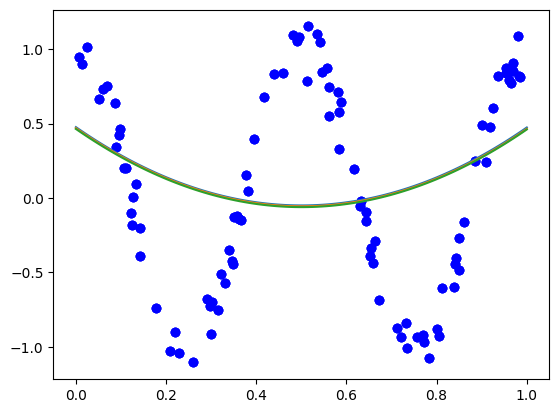

In [23]:
import jax
import jax.numpy as jnp

x = np.random.rand(100)
epsilon = np.random.uniform(-0.2, 0.2, 100)
y = np.cos(4 * np.pi * x) + epsilon


# Define the model function for polynomial regression
def model(params, x):
    # Horner's method for polynomial evaluation
    return jnp.polyval(params[::-1], x)


# Define the loss function
def loss(params, x, y):
    preds = model(params, x)
    return jnp.mean((preds - y) ** 2)


grad_fn = jax.grad(loss)
grad_fn = jax.jit(grad_fn)


def sgd_poly_regression(x, y, degree, learning_rate, alpha, epochs):
    coeffs = np.random.uniform(-0.4, 0.4, degree + 1)
    velocity = np.zeros(degree + 1)

    for i in range(epochs):
        print("Epoch", i, end="\r")
        for j in range(0, len(x)):
            gradients = grad_fn(coeffs, x[j], y[j])
            velocity = alpha * velocity - learning_rate * gradients
            coeffs += velocity

    return coeffs


degrees = [2, 4, 6, 8, 10, 15, 20, 25]  # Different degrees of the polynomial
alphas = [0.0, 0.1, 0.2, 0.5]  # Different momentum terms
results = {}

for degree in degrees:
    for alpha in alphas:
        coeffs = sgd_poly_regression(
            x, y, degree, learning_rate=0.1, alpha=alpha, epochs=10000
        )
        results[(degree, alpha)] = coeffs
        print(f"Degree {degree}, alpha {alpha}: {coeffs}")
        plt.scatter(
            x,
            y,
            color="blue",
            label="Data points" if degree == 1 and alpha == 0 else "",
        )
        curve_x = jnp.linspace(0, 1, 100)
        curve_y = jnp.polyval(coeffs[::-1], curve_x)
        plt.plot(curve_x, curve_y, label=f"Degree {degree}, alpha {alpha}")

plt.xlabel("x")
plt.ylabel("y")
plt.title("SGD Polynomial Regression with Various Degrees and Alphas")
plt.legend()
plt.show()

In [ ]:
# plot error by degree
plt.figure()
for alpha in alphas:
    error = []
    for degree in degrees:
        coeffs = results[(degree, alpha)]
        curve_x = jnp.linspace(0, 1, 100)
        curve_y = jnp.polyval(coeffs[::-1], curve_x)
        error.append(jnp.abs(jnp.mean((curve_y - jnp.cos(4 * np.pi * curve_x)))))
    plt.plot(degrees, error, label=f"alpha {alpha}")
plt.xlabel("Degree")
plt.ylabel("Error")
plt.title("SGD Polynomial Regression MAE by Degree")
plt.legend()
plt.show()

Degree 2, alpha 0.0: [ 0.85664225 -2.1658318   2.1841373 ]
Degree 2, alpha 0.1: [ 0.89563805 -2.1112692   2.1494236 ]
Degree 2, alpha 0.2: [ 0.9411186 -2.0344343  2.0938673]
Degree 2, alpha 0.5: [ 1.1456041 -1.5933434  1.7114941]
Degree 4, alpha 0.0: [  0.84603536  -3.0747445    9.735479   -15.471002     9.101879  ]
Degree 4, alpha 0.1: [  0.89287513  -3.2580433   10.739648   -17.051249     9.887076  ]
Degree 4, alpha 0.2: [  0.9501588  -3.5291626  12.170056  -19.268843   10.970431 ]
Degree 4, alpha 0.5: [  1.2172487  -4.8809605  19.181723  -29.935328   16.04326  ]
Degree 6, alpha 0.0: [  1.1205817  -9.215746   26.708752  -11.466651  -22.130444   -5.699248
  22.967606 ]
Degree 6, alpha 0.1: [  1.1945915 -10.018925   29.072634  -12.392067  -23.857222   -6.2451906
  24.65085  ]
Degree 6, alpha 0.2: [  1.2765201 -10.89765    31.686867  -13.42221   -25.901642   -6.521785
  26.315905 ]
Degree 6, alpha 0.5: [  1.6195948 -14.365957   42.12577   -17.658365  -33.51309    -8.065613
  32.97436  ]

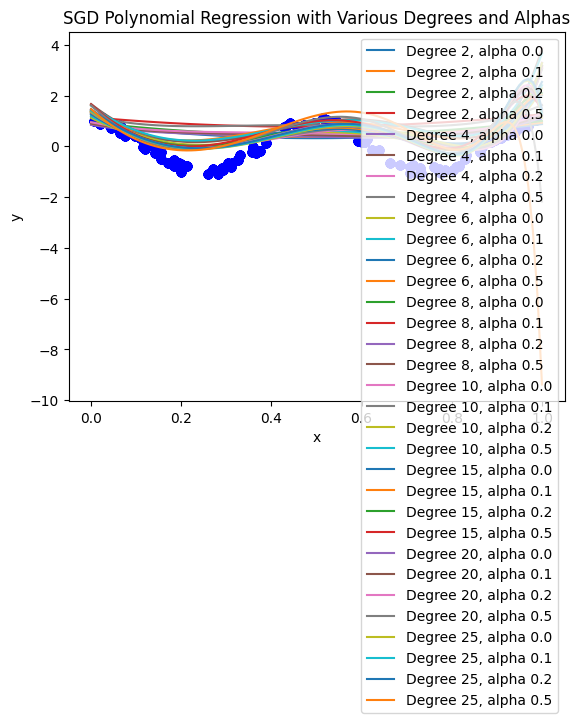

In [29]:
import numpy as np
import matplotlib.pyplot as plt

# Generate artificial data points
np.random.seed(42)  # For reproducibility
n_points = 100
x = np.random.rand(n_points)
epsilon = np.random.uniform(-0.2, 0.2, n_points)
y = np.cos(4 * np.pi * x) + epsilon


# Define the model function for polynomial regression
def model(params, x):
    # Horner's method for polynomial evaluation
    return jnp.polyval(params[::-1], x)


# Define the loss function
def loss(params, x, y):
    preds = model(params, x)
    return jnp.mean((preds - y) ** 2)


grad_fn = jax.grad(loss)
grad_fn = jax.jit(grad_fn)


def sgd_poly_regression(x, y, degree, learning_rate, alpha, epochs):
    coeffs = np.random.uniform(-0.4, 0.4, degree + 1)
    velocity = np.zeros(degree + 1)

    for i in range(epochs):
        print("Epoch", i, end="\r")
        for j in range(0, len(x)):
            gradients = grad_fn(coeffs, x[j], y[j])
            velocity = alpha * velocity - learning_rate * gradients
            coeffs += velocity

    return coeffs


degrees = [2, 4, 6, 8, 10, 15, 20, 25]  # Different degrees of the polynomial
alphas = [0.0, 0.1, 0.2, 0.5]  # Different momentum terms
results = {}

for degree in degrees:
    for alpha in alphas:
        coeffs = sgd_poly_regression(
            x, y, degree, learning_rate=0.1, alpha=alpha, epochs=1000
        )
        results[(degree, alpha)] = coeffs
        print(f"Degree {degree}, alpha {alpha}: {coeffs}")
        plt.scatter(
            x,
            y,
            color="blue",
            label="Data points" if degree == 1 and alpha == 0 else "",
        )
        curve_x = jnp.linspace(0, 1, 100)
        curve_y = jnp.polyval(coeffs[::-1], curve_x)
        plt.plot(curve_x, curve_y, label=f"Degree {degree}, alpha {alpha}")

plt.xlabel("x")
plt.ylabel("y")
plt.title("SGD Polynomial Regression with Various Degrees and Alphas")
plt.legend()
plt.show()

# Comment on results:
# 1. Increasing the polynomial degree improves the fit but may lead to overfitting for higher degrees.
# 2. Adding momentum (higher alpha values) speeds up convergence and helps stabilize the learning process.
# 3. The optimal alpha depends on the problem; alpha values too high may overshoot the optimal solution.